## 1 

First we find $K_I$ without any consideration for plasticity. Since we have an edge-crack in a finite-width panel, we use (2.4a) and substitute the provided values.

In [159]:
import numpy as np
def beta(a,w):
    return 1.122 - 0.231*a/w + 10.55*(a/w)**2 - 21.71*(a/w)**3 + 30.82*(a/w)**4
def KI(a,w,s):
    return s*np.sqrt(np.pi*a)*beta(a,w)
a = 2.
w = 8.
t = .125
s = 12. #ksi
sy = 75. #ksi
print KI(a,w,s)

45.2635967334


We find $K_I = 45.3 \text{ ksi} \sqrt{\text{in}}$.

For plane stress, we use (4.12) with I=2, while for plane strain we set I=6.

In [161]:
#plane stress, I=2
I=2
rp = 1.0/(I*np.pi)*(KI(a,w,s)/sy)**2
print rp

0.0579689890562


In [162]:
#calculate aeff, KI(aeff) until solution converges
KI_old = KI(a,w,s)
aeff = a + rp
KI_new = KI(aeff,w,s)
while ((KI_old-KI_new)/(KI_old))**2 > 0.00001:
    rp = 1.0/(I*np.pi)*(KI(aeff,w,s)/sy)**2
    aeff = a + rp
    KI_old = KI_new
    KI_new = KI(aeff,w,s)

In [163]:
print rp
print KI_new

0.0613514224334
46.6422503984


So for plane stress we have: $K_I = 46.6 \text{ ksi} \sqrt{\text{in}}$

In plane strain we follow the same procedure, with I=6

In [164]:
#plane strain, I=6
I=6
rp = 1.0/(I*np.pi)*(KI(a,w,s)/sy)**2
#calculate aeff, KI(aeff) until solution converges
KI_old = KI(a,w,s)
aeff = a + rp
KI_new = KI(aeff,w,s)
while ((KI_old-KI_new)/(KI_old))**2 > 0.00001:
    rp = 1.0/(I*np.pi)*(KI(aeff,w,s)/sy)**2
    aeff = a + rp
    KI_old = KI_new
    KI_new = KI(aeff,w,s)
print KI_old
print KI_new

45.6944419632
45.7027128915


And in plane strain we have $K_I = 45.7 \text{ ksi} \sqrt{\text{in}}$

For $t=0.125$, we can calculate $I$ directly using (4.13)

In [165]:
I = 6.7 - 1.5/t*(KI(a,w,s)/sy)**2
print I

2.32924119628


We now proceed with the same solution method for $I=2.33$

In [167]:
rp = 1.0/(I*np.pi)*(KI(a,w,s)/sy)**2
#calculate aeff, KI(aeff) until solution converges
KI_old = KI(a,w,s)
aeff = a + rp
KI_new = KI(aeff,w,s)
while ((KI_old-KI_new)/(KI_old))**2 > 0.00001:
    rp = 1.0/(I*np.pi)*(KI(aeff,w,s)/sy)**2
    aeff = a + rp
    KI_old = KI_new
    KI_new = KI(aeff,w,s)
print KI_old
print KI_new

46.3796984203
46.4359606755


As expected, we find $K_I$ somewhere between the plane strain and plane stress solutions, $K_I = 45.9 \text{ ksi} \sqrt{\text{in}}$

## 2

For an infinitely wide, center-cracked panel we use (2.1)
$$K_I = \sigma \sqrt{\pi a}$$

In plane strain, the plastic stress intensity factor, $K_{Ie}$ is given by
$$K_{Ie} = \sigma \sqrt{\pi(a+r_p)}$$
where (in plane strain)
$$r_p = \frac{1}{6\pi} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2$$

Substituting $r_p$ into $K_{Ie}$ gives
$$K_{Ie} = \sigma \sqrt{\pi \left(a+\frac{1}{6\pi} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2\right)}$$


We square both sides to find
$$K_{Ie}^2 = \sigma^2 \pi \left(a+\frac{1}{6\pi} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2\right)$$
Multiplying out we get
$$K_{Ie}^2 = \sigma^2 \pi a+\frac{\sigma^2}{6} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2$$
We can subtract the second term from both sides
$$K_{Ie}^2 - \frac{\sigma^2}{6} \left( \frac{K_{Ie}}{\sigma_{YS}}\right)^2 = \sigma^2 \pi a$$
And simplify
$$K_{Ie}^2\left(1 - \frac{\sigma^2}{6 \sigma_{YS}^2}\right) = \sigma^2 \pi a$$

We can now divide both sides by $\left(1 - \frac{\sigma^2}{6 \sigma_{YS}^2}\right)$ to find
$$K_{Ie}^2 = \frac{\sigma^2 \pi a}{1 - \frac{\sigma^2}{6 \sigma_{YS}^2}}$$
We take the square root of both sides
$$K_{Ie} = \frac{\sigma \sqrt{\pi a}}{\sqrt{1 - \frac{\sigma^2}{6 \sigma_{YS}^2}}}$$
We can now replace $\sigma \sqrt{\pi a}$ with $K_I$
$$K_{Ie} = \frac{K_I}{\sqrt{1 - \frac{\sigma^2}{6 \sigma_{YS}^2}}}$$
And divide both sides by $K_I$
$$\frac{K_{Ie}}{K_I} = \frac{1}{\sqrt{1 - \frac{\sigma^2}{6 \sigma_{YS}^2}}}$$

Now we are ready to generate our plot. Fracture mechanics is only valid when $\sigma < \sigma_{YS}$, so we consider $0<\sigma<\sigma_{YS}$ for our plot.

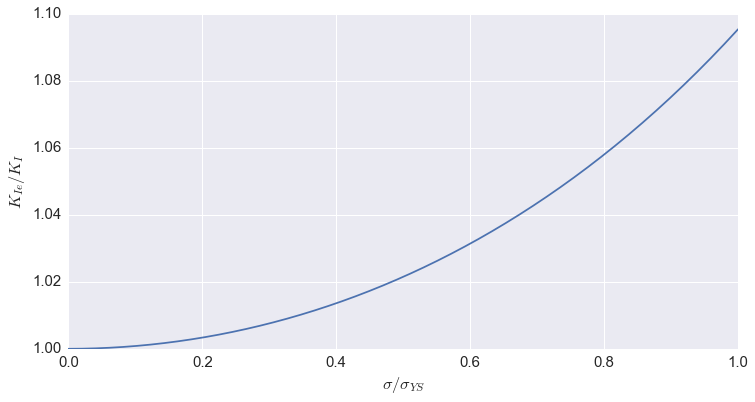

In [75]:
s_sys = np.linspace(0,1)
KIe_KI = 1./(1.-s_sys**2/6.)**.5

import matplotlib.pyplot as plt
import seaborn as sb
sb.set(font_scale=1.5)
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(s_sys,KIe_KI)
plt.xlabel(r'$\sigma / \sigma_{YS}$')
plt.ylabel(r'$K_{Ie} / K_I$')

## 3

In this problem we are asked to find the ratio, $K_{Ie}/K_I$ for some specific conditions on a finite-width, center-cracked panel.

In this case we use (2.2a) for $K_I$ and we use (4.12) to find $r_p$, with $I=2$ for plane stress and $I=6$ for plane strain.

In [190]:
#4.12
def K_I(a,w,s):
    return s*np.sqrt(np.pi*a)*np.sqrt(1/np.cos(np.pi*a/w))

a = 1.
w = 8.
s = 30.
sy = 65.

#plane strain
KIa = K_I(a,w,s)
I = 6.
rp = 1.0/(I*np.pi)*(KI(a,w,s)/sy)**2
#calculate aeff, KI(aeff) until solution converges
KI_old = KI(a,w,s)
aeff = a + rp
KI_new = KI(aeff,w,s)
while ((KI_old-KI_new)/(KI_old))**2 > 0.00001:
    rp = 1.0/(I*np.pi)*(KI(aeff,w,s)/sy)**2
    aeff = a + rp
    KI_old = KI_new
    KI_new = K_I(aeff,w,s)
print KI_old
print KI_new

57.1466149898
57.1556656889


In [191]:
print KI_new/KIa

1.03316757839


For plane strain we have $K_{Ie}/K_I = 1.03$

In [192]:
#plane stress
w=5.
KIb = K_I(a,w,s)
I = 2.
rp = 1.0/(I*np.pi)*(KI(a,w,s)/sy)**2
#calculate aeff, KI(aeff) until solution converges
KI_old = KI(a,w,s)
aeff = a + rp
KI_new = KI(aeff,w,s)
while ((KI_old-KI_new)/(KI_old))**2 > 0.00001:
    rp = 1.0/(I*np.pi)*(KI(aeff,w,s)/sy)**2
    aeff = a + rp
    KI_old = KI_new
    KI_new = K_I(aeff,w,s)
print KI_old
print KI_new

75.906535944
76.0614958614


In [193]:
print KI_new/KIb

1.28661169118


For plane stress with $W=5$ we have $K_{Ie}/K_I = 1.29$

If the thickness of the panel was undecided, we can also plot the plasticity effect for varying thickness

In [200]:
t = np.linspace(1./16,5./8)
a = 1.
W = 5.
I = 6.7 - 1.5/t*(KI(a,w,s)/sy)**2
for i in range(len(I)):
    if I[i] < 2.:
        I[i] = 2.
    elif I[i] > 6.:
        I[i] = 6.
rp = 1.0/(I*np.pi)*(KI(a,w,s)/sy)**2
#calculate aeff, KI(aeff) until solution converges
KI_old = [KI(a,w,s),0]
aeff = a + rp
KI_new = KI(aeff,w,s)
while ((max(KI_old)-max(KI_new))/(max(KI_old)))**2 > 0.00000000001:
    rp = 1.0/(I*np.pi)*(KI(aeff,w,s)/sy)**2
    aeff = a + rp
    KI_old = KI_new
    KI_new = K_I(aeff,w,s)
print max(KI_old)
print max(KI_new)

76.2475521356
76.2477567188


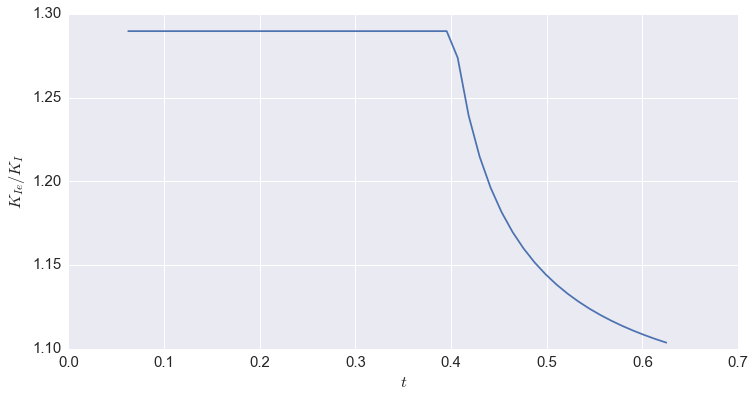

In [201]:
plt.figure(figsize=(12,6))
plt.plot(t,KI_new/K_I(a,w,s))
plt.xlabel(r'$t$')
plt.ylabel(r'$K_{Ie} / K_I$')

Here we see that the thicker the panel is, the lower the effect of plasticity. Panels less than 0.4" thick in this configuration are essentially in a state of plane stress.

## 4

First we calculate $K_I$ for the given plate using (2.4a)

In [180]:
def beta(a,w):
    return 1.122 - 0.231*a/w + 10.55*(a/w)**2 - 21.71*(a/w)**3 + 30.82*(a/w)**4
def KI(a,w,s):
    return s*np.sqrt(np.pi*a)*beta(a,w)
a = 2.
w = 6.
s = 10. #ksi
sy = 50. #ksi
v = 0.33
print KI(a,w,s)

44.9599368987


For Von Mises yield theory in plane stress we have
$$r_p = \frac{K_I^2}{2\pi \sigma_{YS}^2} \cos^2 \frac{\theta}{2} \left ( 1 + 3 \sin^2 \frac{\theta}{2} \right)$$

In [181]:
th = np.linspace(0,2*np.pi,200)
rp_vm_stress = KI(a,w,s)**2/(2*np.pi*sy**2)*np.cos(th/2)**2*(1+3*np.sin(th/2)**2)

For Von Mises yield theory in plane strain we have
$$r_p = \frac{K_I^2}{2\pi \sigma_{YS}^2} \cos^2 \frac{\theta}{2} \left ( 1 - 4\nu + 4\nu^2 + 3\sin^2 \frac{\theta}{2} \right)$$

In [182]:
rp_vm_strain = KI(a,w,s)**2/(2*np.pi*sy**2)*np.cos(th/2)**2*(1-4*v+4*v**2+3*np.sin(th/2)**2)

For Tresca yield in plane stress we have

In [183]:
rp_tr_stress = KI(a,w,s)**2/(2*np.pi*sy**2)*np.cos(th/2)**2*(1+np.sin(th/2))**2

For Tresca yield in plane strain we must first find $\theta_t$

In [184]:
th1 = 2*np.arcsin(1-2*v)

We then use the appropriate formulas, depending on whether $\theta_t < \theta < 2\pi - \theta_t$

In [185]:
rp_tr_strain = np.zeros(len(th)) #initiate array of zeros
for i in range(len(th)):
    if th[i] > th1 and th[i] < 2*np.pi - th1:
        rp_tr_strain[i] = 2*KI(a,w,s)**2/(np.pi*sy**2)*np.cos(th[i]/2)**2*np.sin(th[i]/2)**2
    else:
        rp_tr_strain[i] = KI(a,w,s)**2/(2*np.pi*sy**2)*np.cos(th[i]/2)**2*(1-2*v+np.sin(th[i]/2))**2

Now we make a polar plot to compare this plastic zone shapes

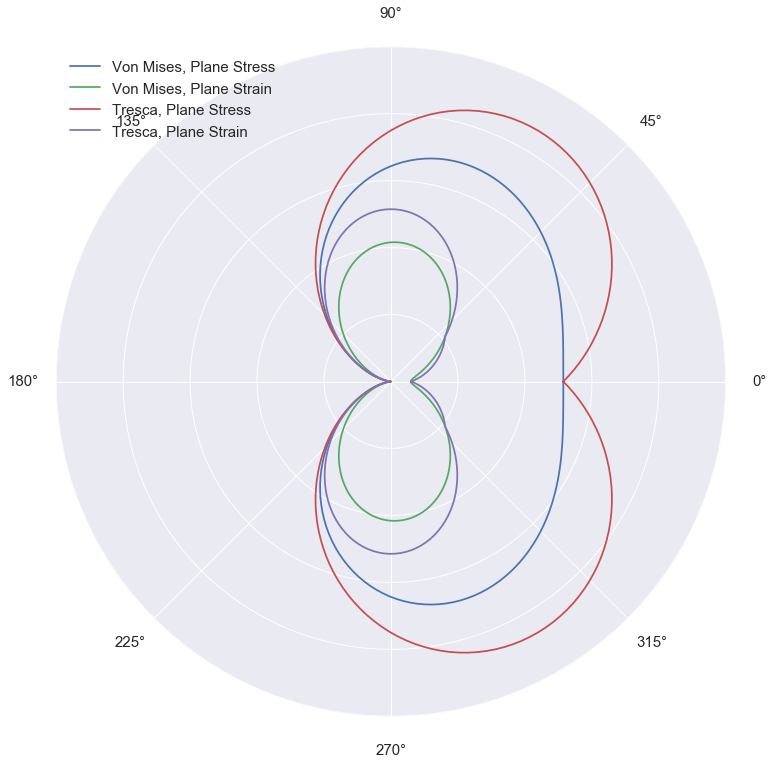

In [186]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111,projection='polar')
ax.set_yticklabels([])
ax.plot(th,rp_vm_stress,label='Von Mises, Plane Stress')
ax.plot(th,rp_vm_strain,label='Von Mises, Plane Strain')
ax.plot(th,rp_tr_stress,label='Tresca, Plane Stress')
ax.plot(th,rp_tr_strain,label='Tresca, Plane Strain')
ax.legend(loc='best')